In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import cm

# parabola
from spaces.twoD import Parabola, SGDOneVariable, SGDOneVariableLRDecay
from spaces.twoD import SGDVisOneVariable

# 3d surfaces

# animation
from animation.scene import Scene, Video, GIFfromMP4Video

# test functions
from spaces.threeD import State

# Functions
A parabolic function  

In [2]:
xs = [i-5 for i in range(11)]
y =  xs

# Simple Gradient Descent

In [3]:
FILE_NAME_WO_EXTENSION = 'sgd'
PLOT_TITLE = 'SGD'
ITER = 29*5
N_BACK = 50

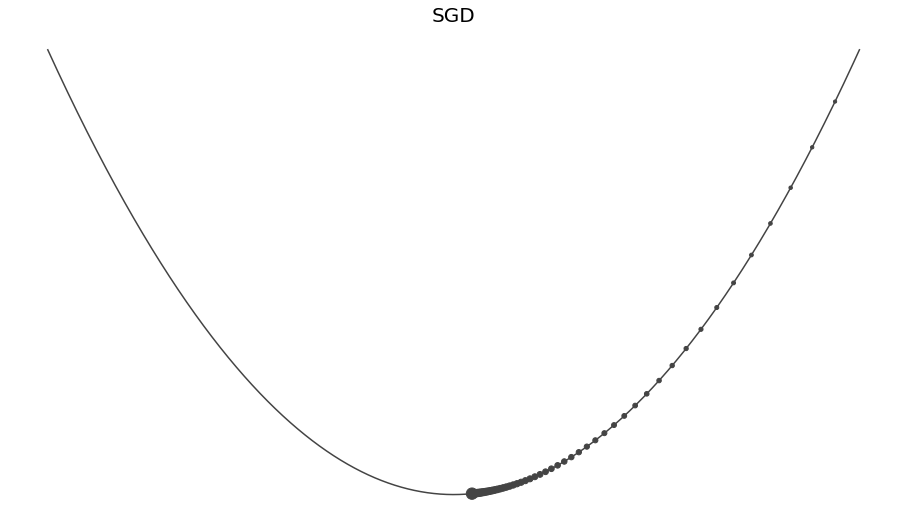

In [4]:
gd = SGDOneVariable(theta = 4, lr = 0.03, x_series = xs)
iters = gd.store_iterations(ITER)
iters_list = [iters]
SGDVisOneVariable(iters=iters_list, plot_title=PLOT_TITLE).export_frame(steps=50, n_back = N_BACK)

# SGD Frames for video

In [5]:
for i in range(ITER):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = SGDVisOneVariable(iters=[iters], plot_title=PLOT_TITLE).export_frame(steps=i, n_back = N_BACK, path = '')
    fig.savefig(file_path)

In [6]:
video = Video(dir_to_save='frames', video_name=FILE_NAME_WO_EXTENSION, frame_rate = 29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=FILE_NAME_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('sgd.gif' from 'sgd.mp4')

## Gradient Descent with LR Decay

In [27]:
PLOT_TITLE =  'SGD with Learning Rate Decay (green) vs SGD (gray)'
FILE_NAME_WO_EXTENSION = 'sgd-with-lr-decay'
steps_n = 50

gd = SGDOneVariableLRDecay(theta = 4, lr = 0.03*5, tau = 10, x_series = xs)
iters_lr_decay = gd.store_iterations(ITER)

## Compare SGD and SGD with LR Decay

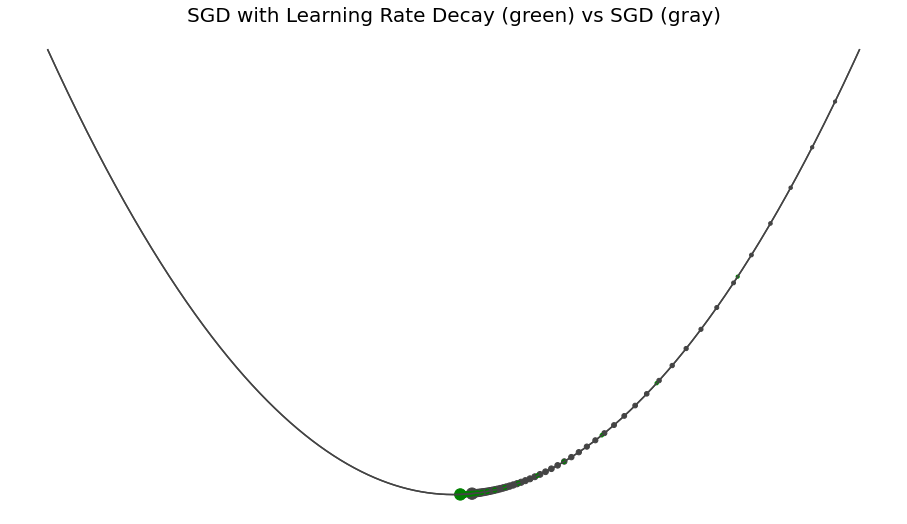

In [28]:
SGDVisOneVariable(iters=[iters, iters_lr_decay], plot_title=PLOT_TITLE).export_frame(steps=steps_n, n_back = 50, path = '')

In [29]:
for i in range(ITER):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = SGDVisOneVariable(iters=[iters, iters_lr_decay], plot_title=PLOT_TITLE).export_frame(steps=i, n_back = N_BACK, path = '')
    fig.savefig(file_path)

In [30]:
video = Video(dir_to_save='frames', video_name=FILE_NAME_WO_EXTENSION, frame_rate = 29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=FILE_NAME_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('sgd-with-lr-decay.gif' from 'sgd-with-lr-decay.mp4')

# Momentum

In [39]:
ITERS = 24*8
ALPHA = 0.95
FILE_NAME_WO_EXTENSION = 'momentum'
NESTEROV_FILE_NAME_WO_EXTENSION = 'sgd-with-momentum-with-nesterov'
PLOT_TITLE = f'Momentum with alpha: {ALPHA}'
NESTEROV_PLOT_TITLE = f'Nesterov Momentum with alpha: {ALPHA}'

In [40]:
h = State(space_lim_min = -6, space_lim_max = 6,
               x_initial = -6,
               y_initial = 0,
         test_function='himmelblau', 
         iteration=ITERS)

steps_standard = h.run_gd(epsilon = 0.001, alpha = ALPHA, nesterov=False)
# steps_nesterov = h.run_gd(epsilon = 0.001, alpha = ALPHA, nesterov=True)
# steps_adam = h.run_adam()
# steps_adagrad = h.run_adagrad()

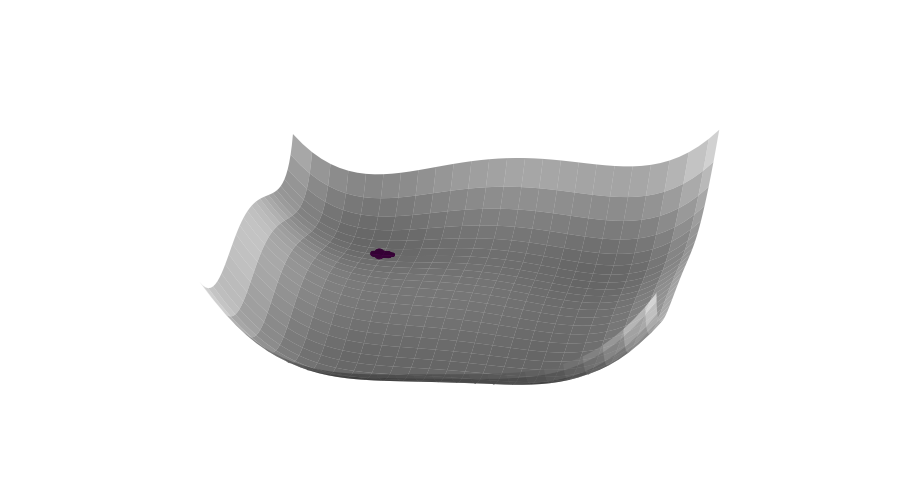

In [41]:
h.plot_steps([steps_standard],
                 steps_until_n=24*8,
                 n_back = 40,
                 colors = ['purple', 'green', 'green', 'red'])

In [42]:
for i in range(ITERS):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = h.plot_steps([steps_standard],
                       steps_until_n=i,
                       azimuth=5+5*math.log(i+1),
                       elevation = 20+5*math.log(i+1),
                       color_map = cm.gray, n_back = 20,
                       plot_title = 'Gradient Descent with Momentum',
                       colors = ['gray', 'red']
                      )
    fig.savefig(file_path)

In [43]:
video = Video(dir_to_save='frames', video_name=FILE_NAME_WO_EXTENSION, frame_rate = 29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=FILE_NAME_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('momentum.gif' from 'momentum.mp4')

# Nesterov Momentum

In [10]:
h = Himmelblau(space_lim_min = -6, space_lim_max = 6,
               x_initial = -1,
               y_initial = -5)

steps = h.run_gd(epsilon = 0.001 , iteration = ITERS, alpha = ALPHA, nesterov=True)

from matplotlib import cm
# h.plot_steps(steps, azimuth=5, elevation = 40, color_map = cm.gray, n_back = 20, steps_until_n=40)

In [17]:
for i in range(ITERS):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = h.plot_steps([steps],
                       steps_until_n=i,
                       azimuth=5-math.log(i+1),
                       elevation = 40+math.log(i+1),
                       color_map = cm.gray, n_back = 20,
                       plot_title = NESTEROV_PLOT_TITLE
                      )
    fig.savefig(file_path)

In [18]:
video = Video(dir_to_save='frames', video_name=NESTEROV_FILE_NAME_WO_EXTENSION, frame_rate = 29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=NESTEROV_FILE_NAME_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('sgd-with-momentum-with-nesterov.gif' from 'sgd-with-momentum-with-nesterov.mp4')

# Adagrad vs RMSProp

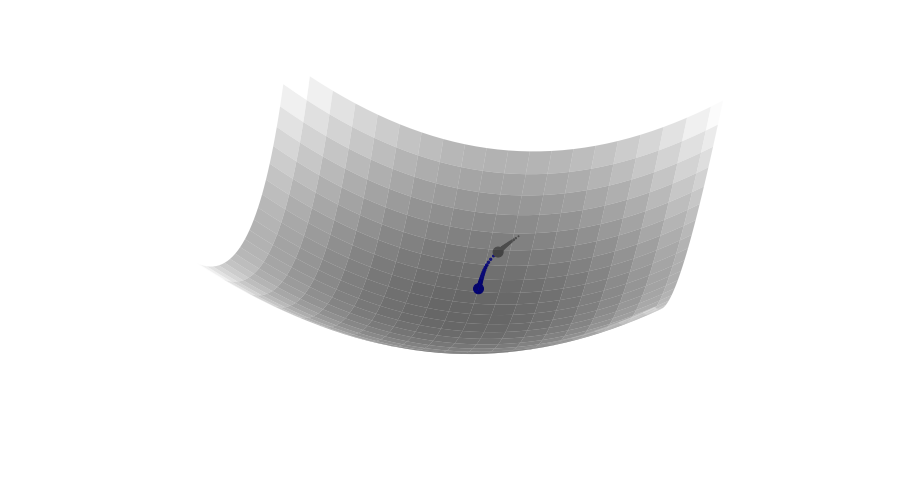

In [41]:
state = State(
    test_function='parabolic',
    x_initial=-3,
    y_initial=0.7,
    space_lim_min = -5, space_lim_max = 5,
    iteration=120
)

# steps_gd_nest = state.run_gd(epsilon=0.05, nesterov=True, alpha=0.9)
# steps_gd = state.run_gd(epsilon=0.05, nesterov=False, alpha=0.9)

steps_adagrad = state.run_adagrad(epsilon=0.08)
steps_rmsprop = state.run_rmsprop(epsilon=0.08)
steps_adam = state.run_adam()

state.plot_steps([steps_rmsprop, steps_adagrad],
                 steps_until_n=20,
                 n_back = 80,
                 colors = ['blue', 'gray', 'red', 'green', 'brown', 'purple'])

In [42]:
# deltax_hist = steps_rmsprop['delta_theta_x_history']
# deltay_hist = steps_rmsprop['delta_theta_y_history']
# x_hist = steps_rmsprop['x_history']
# y_hist = steps_rmsprop['y_history']
# rx_hist = steps_rmsprop['rx_history']
# ry_hist = steps_rmsprop['ry_history']

In [38]:
# import matplotlib.pyplot as plt
# plt.plot(x_hist)
# plt.show()

In [50]:
ITERS = 120
for i in range(ITERS):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = state.plot_steps([steps_adagrad, steps_rmsprop],
                       colors = ['gray', 'red', 'red', 'green', 'brown', 'purple'],
                       steps_until_n=i,
                       azimuth=0+4*math.log(i+1),
                       elevation = 20+6*math.log(i+1),
                       color_map = cm.gray, n_back = 20,
                       plot_title = 'AdaGrad(gray) vs RMSProp(red)'
                      )
    fig.savefig(file_path)

In [51]:
ADAGRAD_WO_EXTENSION = 'adagrad-vs-rmsprop'
video = Video(dir_to_save='frames', video_name=ADAGRAD_WO_EXTENSION, frame_rate = 29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=ADAGRAD_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('adagrad-vs-rmsprop.gif' from 'adagrad-vs-rmsprop.mp4')

# Adam

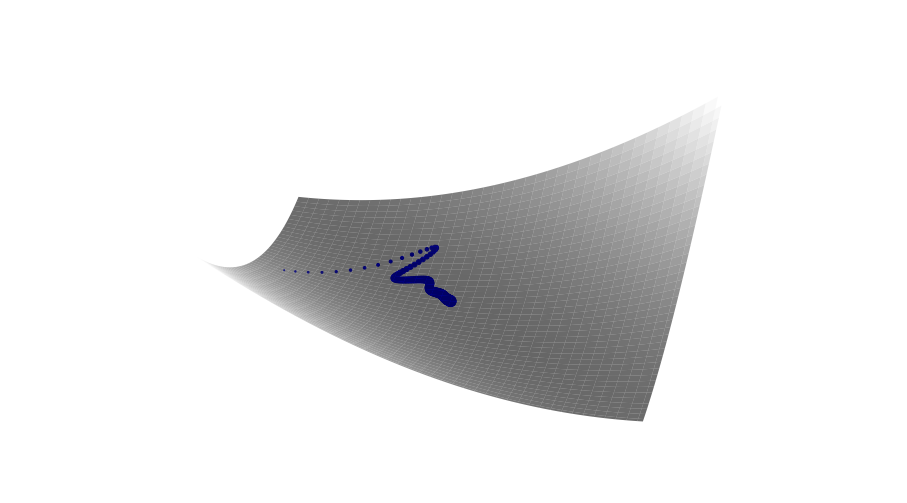

In [67]:
state = State(
    test_function='matyas',
    x_initial=0,
    y_initial=-9,
    space_lim_min = -10, space_lim_max = 10,
    iteration=240
)

# steps_gd_nest = state.run_gd(epsilon=0.05, nesterov=True, alpha=0.9)
# steps_gd = state.run_gd(epsilon=0.05, nesterov=False, alpha=0.9)

steps_adagrad = state.run_adagrad(epsilon=0.1)
steps_rmsprop = state.run_rmsprop(epsilon=0.1)
steps_adam = state.run_adam(epsilon = 0.01)

state.plot_steps([steps_adam],
                 steps_until_n=120,
                 n_back = 120,
                 colors = ['blue', 'gray', 'red', 'green', 'brown', 'purple'])

In [72]:
ITERS = 24*7
for i in range(ITERS):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = state.plot_steps([steps_adam],
                       colors = ['blue', 'gray', 'red', 'green', 'brown', 'purple'],
                       steps_until_n=i,
                       azimuth=0+2*math.log(i+1),
                       elevation = 40+3*math.log(i+1),
                       color_map = cm.gray, n_back = 20,
                       plot_title = 'Adam Optimizer'
                      )
    fig.savefig(file_path)

In [73]:
ADAGRAD_WO_EXTENSION = 'adam'
video = Video(dir_to_save='frames', video_name=ADAGRAD_WO_EXTENSION, frame_rate = 29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=ADAGRAD_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('adam.gif' from 'adam.mp4')